<a href="https://colab.research.google.com/github/Amar-AIcloud/Faster-RCNN-Object-Detection/blob/main/TFOD_Project_faster_rcnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Object Detection 

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.5.0


*Coloning git*

In [ ]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 58275, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 58275 (delta 29), reused 36 (delta 0), pack-reused 58210
Receiving objects: 100% (58275/58275), 573.00 MiB | 28.51 MiB/s, done.
Resolving deltas: 100% (40461/40461), done.


In [ ]:
pwd

'/content'

In [ ]:
cd /content/models/research


/content/models/research


In [ ]:
pwd


'/content/models/research'

In [ ]:
!protoc object_detection/protos/*.proto --python_out=.

In [ ]:
!git clone https://github.com/cocodataset/cocoapi.git

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 14.75 MiB/s, done.
Resolving deltas: 100% (576/576), done.


In [ ]:
cd cocoapi/PythonAPI

/content/models/research/cocoapi/PythonAPI


In [ ]:
pwd

'/content/models/research/cocoapi/PythonAPI'

In [ ]:
!make # for compilation purpose


python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/models/research/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/pycocotools
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fdebug-prefix-map=/build/python3.7-OGiuun/python3.7-3.7.10=. -fstack-protector-strong -Wformat -Werror=format-security -g -fdebug-prefix-map=/build/python3.7-OGiuun/python3.7-3.7.10=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.7/dist-packages/n

In [ ]:
cp -r pycocotools /content/models/research

Install Object Detection API

In [ ]:
cd ..


/content/models/research/cocoapi


In [ ]:
cd ..

/content/models/research


In [ ]:
cp object_detection/packages/tf2/setup.py .

In [ ]:
!python -m pip install .

Processing /content/models/research
     |████████████████████████████████| 9.6MB 26.8MB/s 
     |████████████████████████████████| 358kB 51.1MB/s 
     |████████████████████████████████| 1.6MB 49.5MB/s 
     |████████████████████████████████| 153kB 84.8MB/s 
     |████████████████████████████████| 61kB 6.8MB/s 
     |████████████████████████████████| 2.3MB 44.6MB/s 
     |████████████████████████████████| 829kB 59.1MB/s 
     |████████████████████████████████| 61kB 7.4MB/s 
     |████████████████████████████████| 38.2MB 86kB/s 
     |████████████████████████████████| 645kB 46.8MB/s 
     |████████████████████████████████| 1.2MB 44.0MB/s 
     |████████████████████████████████| 51kB 5.8MB/s 
     |████████████████████████████████| 102kB 10.6MB/s 
     |████████████████████████████████| 686kB 47.5MB/s 
     |████████████████████████████████| 174kB 68.3MB/s 
  Created wheel for object-detection: filename=object_detection-0.1-cp37-none-any.whl size=1652710 sha256=7586cf1dd43619d605c2000c9

**LabelImg(Preparing the Dataset**

In [ ]:
!pip install labelImg

     |████████████████████████████████| 256kB 6.2MB/s 
     |████████████████████████████████| 8.3MB 8.8MB/s 
     |████████████████████████████████| 317kB 41.4MB/s 
     |████████████████████████████████| 59.9MB 66kB/s 
  Created wheel for labelImg: filename=labelImg-1.8.5-py2.py3-none-any.whl size=258440 sha256=4867a7b9a4318ffcdb35331f82097dcf7eaf8269b6efca44782fc62db083645b
  Stored in directory: /root/.cache/pip/wheels/53/b2/f4/02f21e727c596a7f97b29fdadbff6cbb209b135548e64a5a64
Successfully built labelImg


Labeling the images

In [ ]:
pwd

'/content/models/research'

In [ ]:
cd ..

/content/models


In [ ]:
cd ..

/content


In [ ]:
!pip install labelImg

Added Train and test data(going inside pretrained model)

In [ ]:
cd /content/training/pretrained_models

/content/training/pretrained_models


In [ ]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_resnet50_v1_640x640_coco17_tpu-8.tar.gz

--2021-06-13 14:29:18--  http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_resnet50_v1_640x640_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 173.194.79.128, 2a00:1450:4013:c05::80
Connecting to download.tensorflow.org (download.tensorflow.org)|173.194.79.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211996178 (202M) [application/x-tar]
Saving to: ‘faster_rcnn_resnet50_v1_640x640_coco17_tpu-8.tar.gz’

faster_rcnn_resnet5 100%[===================>] 202.17M  48.8MB/s    in 4.1s    

2021-06-13 14:29:23 (48.8 MB/s) - ‘faster_rcnn_resnet50_v1_640x640_coco17_tpu-8.tar.gz’ saved [211996178/211996178]



In [ ]:
!tar -xvf faster_rcnn_resnet50_v1_640x640_coco17_tpu-8.tar.gz

faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/
faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/checkpoint/
faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/checkpoint/checkpoint
faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/checkpoint/ckpt-0.index
faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/pipeline.config
faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/saved_model/
faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/saved_model/saved_model.pb
faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/saved_model/variables/
faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/saved_model/variables/variables.index


*Adding Label map and Xml to record File*

In [ ]:
cd /content/training

/content/training


In [ ]:
pwd

'/content/training'

In [ ]:
# Create train data:
!python generate_tfrecord.py -x /content/training/images/train -l /content/training/Annotations/label_map.pbtxt -o /content/training/Annotations/train.record

# Create test data:
!python generate_tfrecord.py -x /content/training/images/test -l /content/training/Annotations/label_map.pbtxt -o /content/training/Annotations/test.record

Successfully created the TFRecord file: /content/training/Annotations/train.record
Successfully created the TFRecord file: /content/training/Annotations/test.record


Adding my_ssd folder&Pipeline_config to models in Training

In [ ]:
cd /content/training


/content/training


In [ ]:
!python model_main_tf2.py --model_dir=/content/training/models/my_faster_rcnn_resnet50_v1_fpn --pipeline_config_path=/content/training/models/my_faster_rcnn_resnet50_v1_fpn/pipeline.config

2021-06-13 14:49:04.803927: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-13 14:49:07.763307: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-06-13 14:49:07.863106: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-06-13 14:49:07.863179: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (26539f0cd6e6): /proc/driver/nvidia/version does not exist
W0613 14:49:07.890737 140168514467712 cross_device_ops.py:1387] There are non-GPU devices in `tf.distribute.Strategy`, not using nccl allreduce.
W0613 14:49:07.891120 140168514467712 mirrored_strategy.py:379] Collective ops is not configured at program startup. Some performance features may not be enabled.
INFO:tensorflow:Using MirroredStrategy w

In [ ]:
pwd

'/content/training'

**Evaluating the Model**

In [ ]:

!python model_main_tf2.py --model_dir=/content/training/models/my_ssd_resnet101_v1_fpn --pipeline_config_path=/content/training/models/my_ssd_resnet101_v1_fpn/pipeline.config --checkpoint_dir=/content/training/models/my_ssd_resnet101_v1_fpn

2021-06-10 09:28:21.620553: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
W0610 09:28:30.345706 139897811195776 model_lib_v2.py:1082] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I0610 09:28:30.346054 139897811195776 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0610 09:28:30.346163 139897811195776 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I0610 09:28:30.346286 139897811195776 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W0610 09:28:30.346462 139897811195776 model_lib_v2.py:1103] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
2021-06-10 09:28:30.404926: I tensorflow/stream_executor/

**Exporting the model**

In [ ]:
!python \exporter_main_v2.py --input_type image_tensor --pipeline_config_path /content/training/models/my_ssd_resnet101_v1_fpn/pipeline.config --trained_checkpoint_dir /content/training/models/my_ssd_resnet101_v1_fpn --output_directory /content/training/exported-models/my_model

2021-06-10 10:11:44.541118: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-10 10:11:46.796830: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-06-10 10:11:46.809699: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-06-10 10:11:46.809801: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (e381e13b0781): /proc/driver/nvidia/version does not exist
2021-06-10 10:11:46.810268: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX512F
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Instruc

Interfercing Trained Models

Loading model...Done! Took 25.621776342391968 seconds
Running inference for /content/training/images/train/b111.jpg... Done


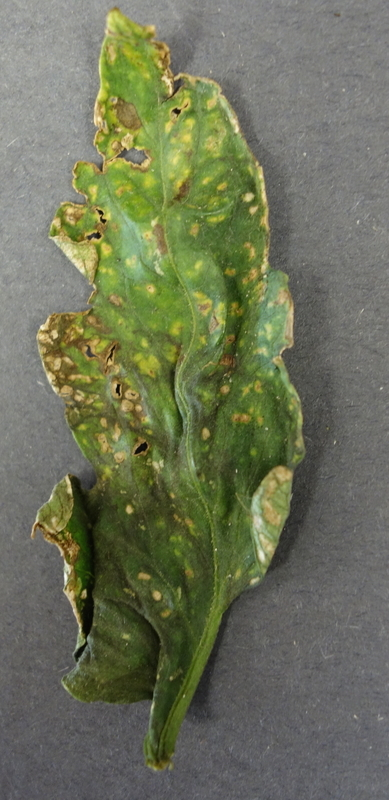

In [ ]:
"""
Object Detection (On Image) From TF2 Saved Model
=====================================
"""

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
import pathlib
import tensorflow as tf
import cv2
import argparse
from google.colab.patches import cv2_imshow

# Enable GPU dynamic memory allocation
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# PROVIDE PATH TO IMAGE DIRECTORY
IMAGE_PATHS = '/content/training/images/train/b111.jpg'


# PROVIDE PATH TO MODEL DIRECTORY
PATH_TO_MODEL_DIR = '/content/training/exported-models/my_model'

# PROVIDE PATH TO LABEL MAP
PATH_TO_LABELS = '/content/training/Annotations/label_map.pbtxt'

# PROVIDE THE MINIMUM CONFIDENCE THRESHOLD
MIN_CONF_THRESH = float(0.60)

# LOAD THE MODEL

import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR + "/saved_model"

print('Loading model...', end='')
start_time = time.time()

# LOAD SAVED MODEL AND BUILD DETECTION FUNCTION
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

# LOAD LABEL MAP DATA FOR PLOTTING

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.
    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.
    Args:
      path: the file path to the image
    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))




print('Running inference for {}... '.format(IMAGE_PATHS), end='')

image = cv2.imread(IMAGE_PATHS)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_expanded = np.expand_dims(image_rgb, axis=0)

# The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
input_tensor = tf.convert_to_tensor(image)
# The model expects a batch of images, so add an axis with `tf.newaxis`.
input_tensor = input_tensor[tf.newaxis, ...]

# input_tensor = np.expand_dims(image_np, 0)
detections = detect_fn(input_tensor)

# All outputs are batches tensors.
# Convert to numpy arrays, and take index [0] to remove the batch dimension.
# We're only interested in the first num_detections.
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
               for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

image_with_detections = image.copy()

# SET MIN_SCORE_THRESH BASED ON YOU MINIMUM THRESHOLD FOR DETECTIONS
viz_utils.visualize_boxes_and_labels_on_image_array(
      image_with_detections,
      detections['detection_boxes'],
      detections['detection_classes'],
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=0.5,
      agnostic_mode=False)

print('Done')
# DISPLAYS OUTPUT IMAGE
cv2_imshow(image_with_detections)
# CLOSES WINDOW ONCE KEY IS PRESSED


In [ ]:
!tensorboard --logdir=/content/training/models/my_ssd_resnet101_v1_fpn